## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
store_df = pd.read_csv("Sample_Superstore.csv", encoding='latin1')
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# EDA

## Understanding the dataset

In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
store_df.shape

(9994, 21)

In [5]:
store_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
store_df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
store_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
store_df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### There is no null values in the dataset

In [9]:
store_df.duplicated().sum()

np.int64(0)

In [10]:
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
store_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
store_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

# Data cleaning

In [13]:
store_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Changing the datatype of the necessary columns

In [14]:
store_df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [15]:
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])
store_df['Ship Date'] = pd.to_datetime(store_df['Ship Date'])

In [16]:
store_df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Drop Unnecessary columns 

In [17]:
store_df=store_df.drop(columns =['Row ID'])

In [77]:
store_df.shape

(9994, 21)

In [78]:
store_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


## Segment Analysis

In [22]:
segment_wise_customers = store_df['Segment'].value_counts().reset_index()
segment_wise_customers.columns = ['Customer Type', 'Count']
print(segment_wise_customers)


  Customer Type  Count
0      Consumer   5191
1     Corporate   3020
2   Home Office   1783


## Which type of customers does our business mostly serve, and which customer segments contribute the most to overall sales and profit?

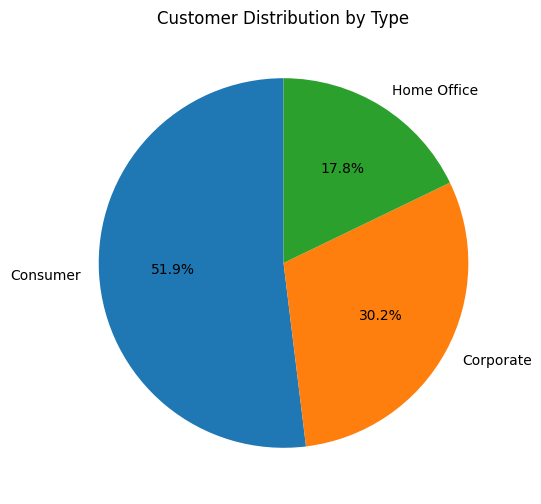

In [23]:
plt.figure(figsize=(6,6))
plt.pie(segment_wise_customers['Count'], labels=segment_wise_customers['Customer Type'], autopct='%1.1f%%',startangle=90)
plt.title("Customer Distribution by Type")
plt.show()


### Individual customers (Consumer segment) form the highest percentage of the customer base. 

In [24]:
segment_sales=store_df.groupby('Segment')[['Sales','Profit']].sum().round(2)

In [25]:
segment_sales

,Sales,Profit
Segment,,
Consumer,1161401.34,134119.21
Corporate,706146.37,91979.13
Home Office,429653.15,60298.68


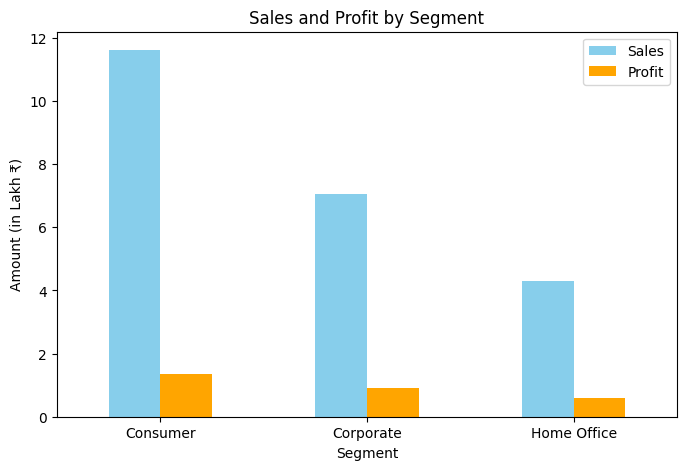

In [26]:
segment_sales_lakh = segment_sales / 1e5
segment_sales_lakh[['Sales','Profit']].plot(kind='bar',figsize=(8,5),color=['skyblue','orange'],title='Sales and Profit by Segment')
plt.ylabel('Amount (in Lakh ₹)')
plt.xticks(rotation=0)
plt.show()


### From this graph we came to know Consumer segment contributes the highest sales and profit

## Product Category Analysis

In [27]:
product_category = store_df['Category'].value_counts().reset_index()
product_category.columns = ['Category', 'Count']
print(product_category)


          Category  Count
0  Office Supplies   6026
1        Furniture   2121
2       Technology   1847


## Which product category contributes the most to our overall sales and profit, and which category is most preferred by customers?

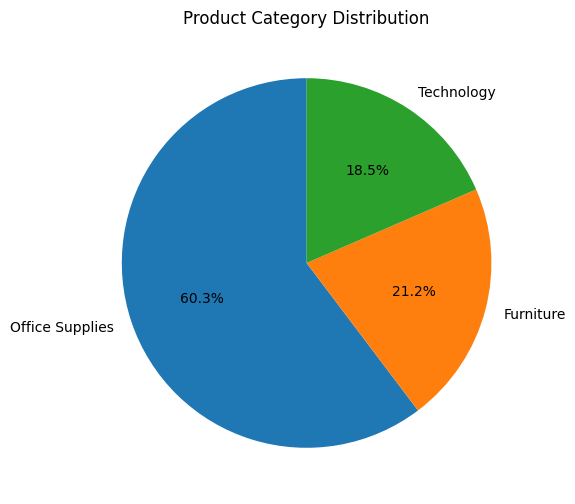

In [28]:
plt.figure(figsize=(6,6))
plt.pie(product_category['Count'], labels=product_category['Category'], autopct='%1.1f%%',startangle=90)
plt.title("Product Category Distribution")
plt.show()


## From this chart we came to know "Office Supplies" are the most bought product category

In [29]:
product_category_sales=store_df.groupby('Category')[['Sales','Profit']].sum().round(2).sort_values(by=['Profit'], ascending=False)

In [30]:
product_category_sales

,Sales,Profit
Category,,
Technology,836154.03,145454.95
Office Supplies,719047.03,122490.80
Furniture,741999.80,18451.27


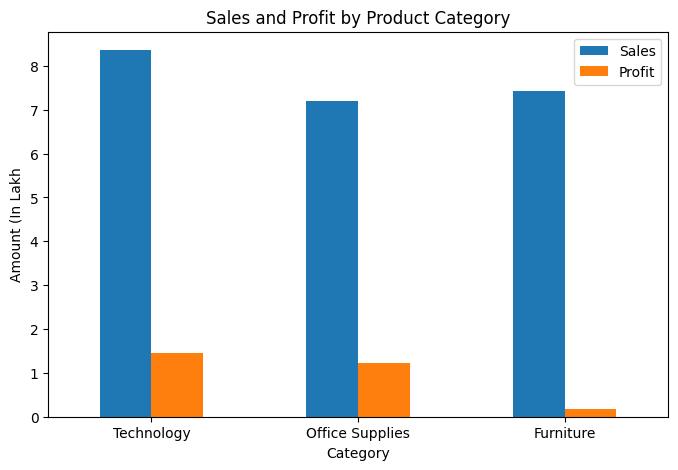

In [31]:
product_category_sales=product_category_sales/1e5
product_category_sales[['Sales','Profit']].plot(kind='bar',figsize=(8,5),title='Sales and Profit by Product Category')
plt.ylabel('Amount (In Lakh')
plt.xticks(rotation=0)
plt.show()


### Although Office Supplies is the most purchased category, Technology products generated the highest sales and profit. Office Supplies also performed well in profit, but Furniture recorded the lowest profit—over 75% less than Technology and Office Supplies.

# Product Sub-Category Analysis

In [32]:
product_subcategory = store_df['Sub-Category'].value_counts().reset_index()
product_subcategory.columns = ['Sub-Category', 'Count']
print(product_subcategory)


   Sub-Category  Count
0       Binders   1523
1         Paper   1370
2   Furnishings    957
3        Phones    889
4       Storage    846
5           Art    796
6   Accessories    775
7        Chairs    617
8    Appliances    466
9        Labels    364
10       Tables    319
11    Envelopes    254
12    Bookcases    228
13    Fasteners    217
14     Supplies    190
15     Machines    115
16      Copiers     68


## "Which sub-category of products generates the highest sales and profit, and which sub-categories are most preferred by customers?"

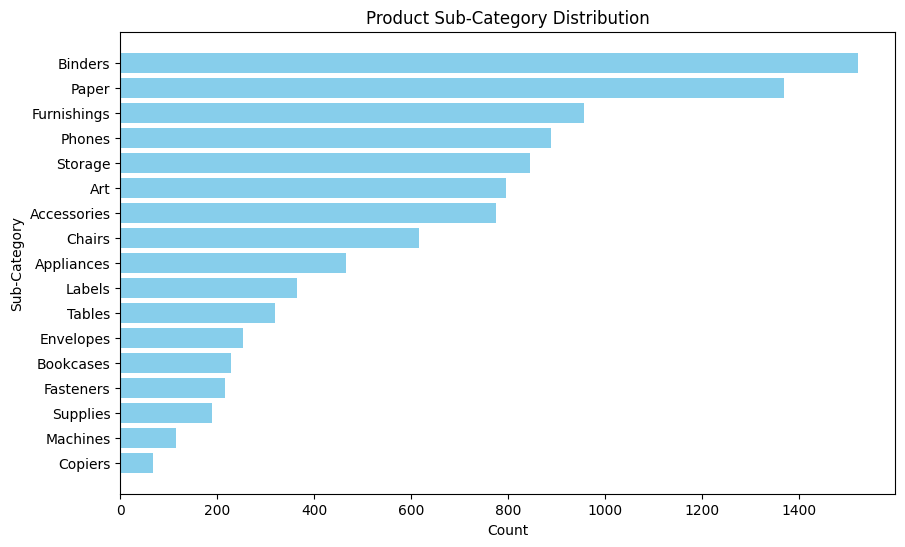

In [33]:
plt.figure(figsize=(10,6))
plt.barh(product_subcategory['Sub-Category'], product_subcategory['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.title('Product Sub-Category Distribution')
plt.gca().invert_yaxis()
plt.show()

## Binders are the most bought "Sub-Category" followed by "Paper"

In [34]:
product_subcategory_sales=store_df.groupby('Sub-Category')[['Sales','Profit']].sum().round(2).sort_values(by='Profit', ascending=False)

In [35]:
product_subcategory_sales

,Sales,Profit
Sub-Category,,
Copiers,149528.03,55617.82
Phones,330007.05,44515.73
Accessories,167380.32,41936.64
Paper,78479.21,34053.57
Binders,203412.73,30221.76
Chairs,328449.10,26590.17
Storage,223843.61,21278.83
Appliances,107532.16,18138.01
Furnishings,91705.16,13059.14


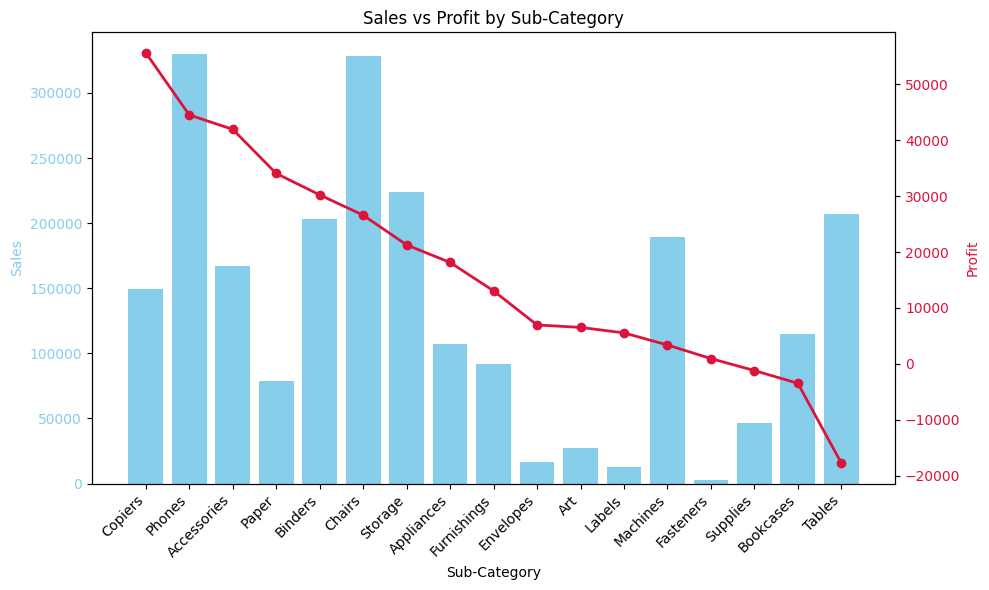

In [36]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(product_subcategory_sales.index, product_subcategory_sales['Sales'], color='skyblue', label='Sales')
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Sales', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()
ax2.plot(product_subcategory_sales.index, product_subcategory_sales['Profit'], color='crimson', marker='o', linewidth=2, label='Profit')
ax2.set_ylabel('Profit', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
plt.title('Sales vs Profit by Sub-Category')
fig.tight_layout()
plt.show()

### Phones generated the highest sales, but profit was much lower than expected, showing lower profitability.
### Copiers had the highest profit, despite lower sales than Phones.
### Supplies, Bookcases, and Tables made negative profit, indicating losses.These sub-categories need attention.

In [37]:
store_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.0%
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.0%
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.0%
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.0%
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25%


# Region-wise Analysis

In [38]:
Region = store_df['Region'].value_counts().reset_index()
Region.columns = ['Region', 'Count']
print(Region)

    Region  Count
0     West   3203
1     East   2848
2  Central   2323
3    South   1620


## Which region has the highest number of customers, and which region contributes the most to overall sales and profit?

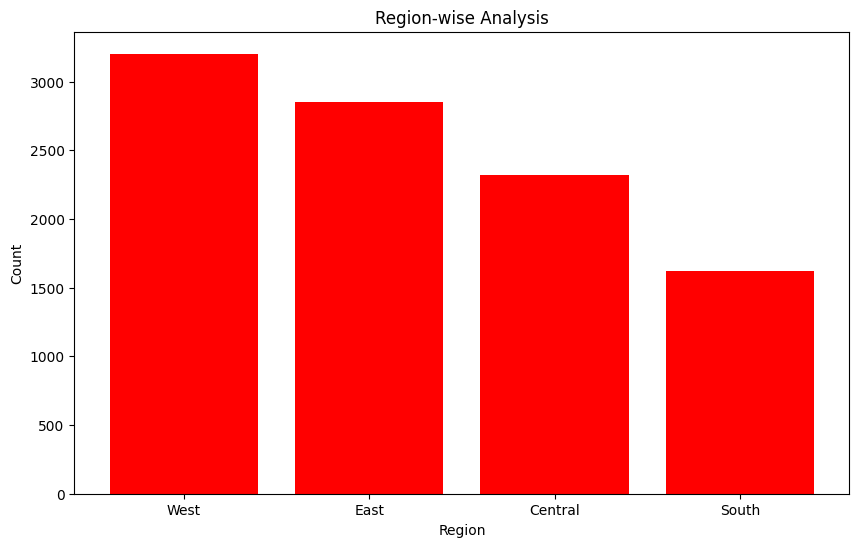

In [39]:
plt.figure(figsize=(10,6))
plt.bar(Region['Region'], Region['Count'], color='red')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region-wise Analysis')
plt.show()

### Most orders came from West region

In [40]:
region_sales = store_df.groupby('Region', as_index=False)['Sales'].sum().round(2).sort_values('Sales', ascending=False)


In [41]:
region_sales

,Region,Sales
3,West,725457.82
1,East,678781.24
0,Central,501239.89
2,South,391721.90


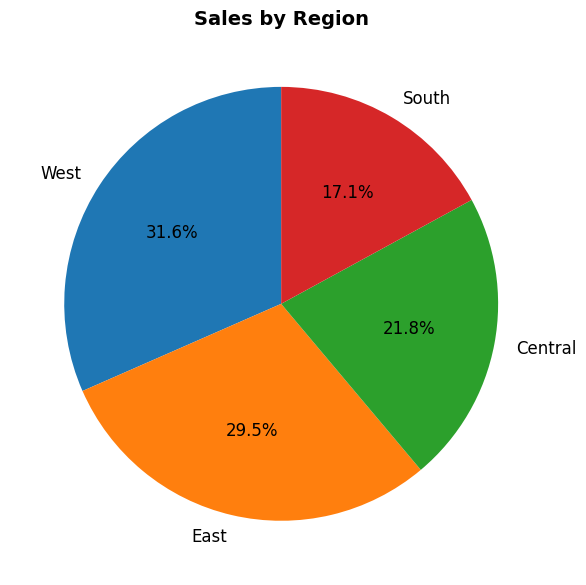

In [42]:
plt.figure(figsize=(6, 6))
plt.pie(region_sales['Sales'],labels=region_sales['Region'],autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Sales by Region', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### West region achieved the highest sales of ₹725,457.82 (31.6%), while South recorded the lowest at ₹391,721.90 (17.1%).

In [43]:
region_profit = store_df.groupby('Region', as_index=False)['Profit'].sum().round(2).sort_values('Profit', ascending=False)

In [44]:
region_profit

,Region,Profit
3,West,108418.45
1,East,91522.78
2,South,46749.43
0,Central,39706.36


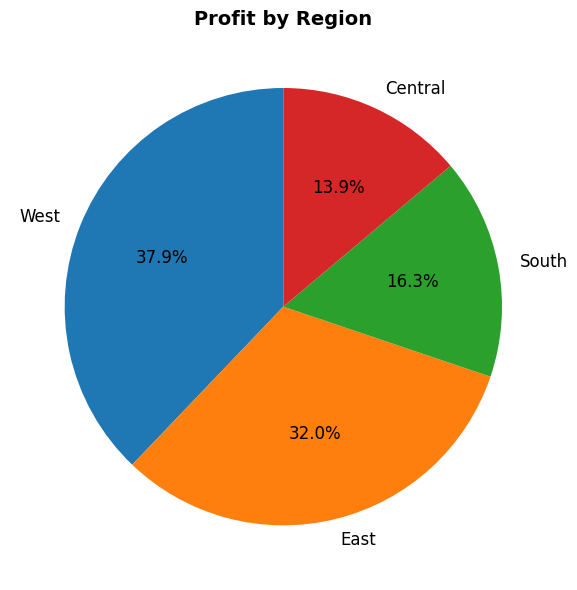

In [45]:
plt.figure(figsize=(6, 6))
plt.pie(region_profit['Profit'],labels=region_profit['Region'],autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Profit by Region', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### The West and East regions received the most orders, leading to the highest sales and profits, with West contributing 37.9% and East 32.0% of total profit.

# Product Analysis

## What are the mostly purchased Top 10 products by the customers?

In [46]:
product = store_df['Product Name'].value_counts().reset_index()
product.columns = ['Products', 'Count']
print(product.head(10))

                                            Products  Count
0                                    Staple envelope     48
1                                            Staples     46
2                                  Easy-staple paper     46
3                            Avery Non-Stick Binders     20
4                            Staples in misc. colors     19
5                                     Staple remover     18
6                         KI Adjustable-Height Table     18
7                            Storex Dura Pro Binders     17
8                         Staple-based wall hangings     16
9  Logitech 910-002974 M325 Wireless Mouse for We...     15


## There are 1850 Unique Products in the store but above mentioned are the "Top 10 Products" mostly bought by the customers in those Staple envelope,Staples,Easy-staple paper are the products most bought by the customers

In [47]:
product_sales=store_df.groupby('Product Name')[['Sales','Profit']].sum().round(2).sort_values(by='Sales', ascending=False)

## How many products gave Negative profit?

In [48]:
product_sales[product_sales['Profit']<0]

,Sales,Profit
Product Name,,
Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,-1811.08
GBC DocuBind P400 Electric Binding System,17965.07,-1878.17
High Speed Automatic Electric Letter Opener,17030.31,-262.00
Lexmark MX611dhe Monochrome Laser Printer,16829.90,-4589.97
Martin Yale Chadless Opener Electric Letter Opener,16656.20,-1299.18
...,...,...
Acco Economy Flexible Poly Round Ring Binder,11.48,-5.74
Computer Printout Index Tabs,11.09,-2.02
Storex Flexible Poly Binders with Double Pockets,10.82,-2.01


## In out of 1850 products 299 products gave the negative profit so we need to give attention onto it

In [49]:
product_profit=store_df.groupby('Product Name')[['Sales','Profit']].sum().round(2).sort_values(by='Profit', ascending=False)

## What are the Top-5 Most profitable products?

In [50]:
# TOP 5 Most Sales & Profit generated products
product_profit.head()

,Sales,Profit
Product Name,,
Canon imageCLASS 2200 Advanced Copier,61599.82,25199.93
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.38,7753.04
Hewlett Packard LaserJet 3310 Copier,18839.69,6983.88
Canon PC1060 Personal Laser Copier,11619.83,4570.93
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.90,4094.98


## What are the Top-5 Most Loss caused products?

In [51]:
# TOP 5 Most Loss Caused products
product_profit.tail()

,Sales,Profit
Product Name,,
Bush Advantage Collection Racetrack Conference Table,9544.72,-1934.40
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.64,-2876.12
Cubify CubeX 3D Printer Triple Head Print,7999.98,-3839.99
Lexmark MX611dhe Monochrome Laser Printer,16829.90,-4589.97
Cubify CubeX 3D Printer Double Head Print,11099.96,-8879.97


### 📊 Most profit & loss products

-  **Highest Sales & Profit:** *Canon imageCLASS 2200 Advanced Copier*  
  → **Sales:** ₹61,599.82 | **Profit:** ₹25,199.93  

-  **Lowest Profit (Loss):** *Cubify CubeX 3D Printer Double Head Print*  
  → **Loss:** ₹8,879.97  

 **Observation:** Copier products drive high revenue, while some 3D printers cause major losses


In [52]:
store_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.0%
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.0%
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.0%
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.0%
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25%


In [53]:
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'])
store_df['Year'] = store_df['Order Date'].dt.year
yearly_sales = store_df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()
print(yearly_sales)


   Year        Sales      Profit
0  2014  484247.4981  49543.9741
1  2015  470532.5090  61618.6037
2  2016  609205.5980  81795.1743
3  2017  733215.2552  93439.2696


## How have sales and profit trends changed over the years, and which year recorded the highest performance?

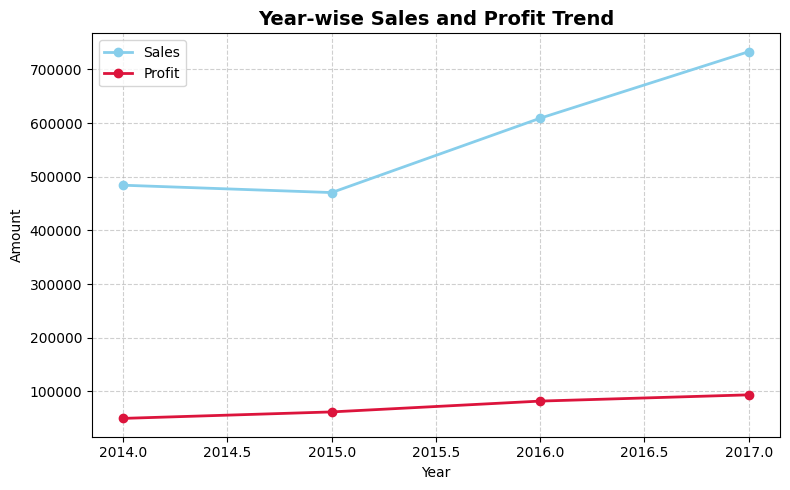

In [54]:
plt.figure(figsize=(8,5))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linewidth=2, label='Sales', color='skyblue')
plt.plot(yearly_sales['Year'], yearly_sales['Profit'], marker='o', linewidth=2, label='Profit', color='crimson')
plt.title('Year-wise Sales and Profit Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 📈 Year-wise Sales & Profit Insights

- 💰 **Sales** grew steadily from **₹4.84L in 2014** to **₹7.33L in 2017**, showing strong year-over-year growth.  
- 📊 **Profit** also increased from **₹49K to ₹93K**, reflecting improved operational efficiency.  
- 🚀 **2017** emerged as the **best performing year**, marking the highest sales and profit overall.


# Discount vs Sales

## How does the discount percentage affect sales, and do higher discounts lead to increased sales?

<Axes: xlabel='Discount', ylabel='Sales'>

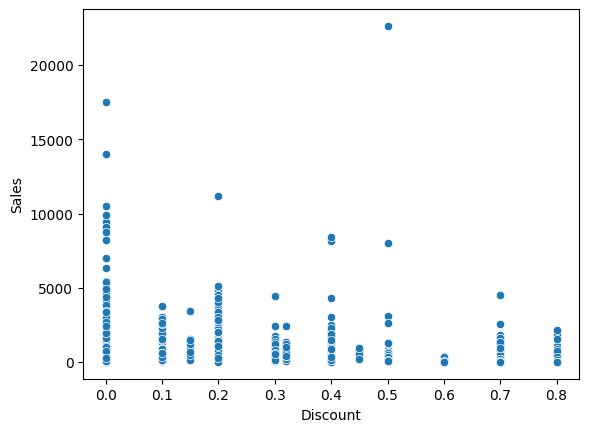

In [55]:
import seaborn as sns
sns.scatterplot(x=store_df['Discount'], y=store_df['Sales'], data=store_df)

## 1. Sales are higher when discounts are low – big discounts don't always boost sales.  
## 2. Some products sell a lot even with little or no discount – demand matters more than discount.


<Axes: >

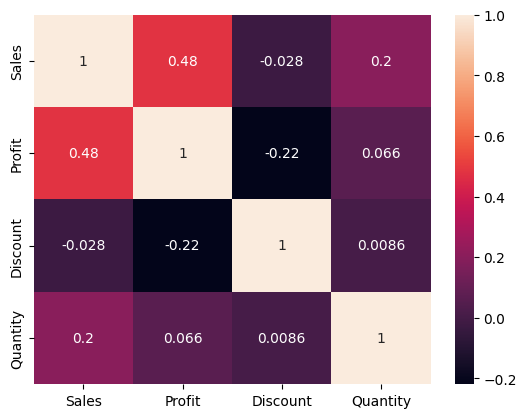

In [61]:
sns.heatmap(store_df[['Sales','Profit','Discount','Quantity']].corr(),annot=True)

## Sales and profit move together moderately, but offering discounts doesn’t strongly impact sales and can slightly reduce profit.

## How much is the total sales, total profit, and overall profit margin percentage of the company?

In [75]:
total = store_df[['Sales', 'Profit']].sum()
profit_margin = (store_df['Profit'].sum() / store_df['Sales'].sum()) * 100

print(f"Total Sales: ₹{total['Sales']:,.0f}")
print(f"Total Profit: ₹{total['Profit']:,.0f}")
print(f"Overall Profit Margin: {profit_margin:.1f}%")


Total Sales: ₹2,297,201
Total Profit: ₹286,397
Overall Profit Margin: 12.5%


## What key business insights can be derived from this analysis?

# 💡 BUSINESS INSIGHTS

**1️⃣ Customer Segment**  
- The **Consumer segment** dominates the customer base, contributing the **highest sales and profit** — showing that individual customers are the main revenue drivers.

**2️⃣ Category Performance**  
- **Office Supplies** are the most purchased category, while **Technology** products deliver the **highest revenue and profit**.  
- **Furniture** shows poor performance with **over 75% lower profit** than Technology and Office Supplies.

**3️⃣ Sub-Category Highlights**  
- **Binders** and **Paper** are the most sold items.  
- **Phones** generate high sales but **low profit**, while **Copiers** record the **highest profit**.  
- **Supplies, Bookcases, and Tables** made **losses**, requiring pricing or inventory review.

**4️⃣ Regional Insights**  
- The **West region** leads with **₹7.25L sales (31.6%)** and the **highest profit share (37.9%)**.  
- The **South region** lags behind with only **₹3.91L sales (17.1%)**.  
- The **West and East** regions together contribute nearly **70% of total profit**.

**5️⃣ Top Products Performance**  
- 🏆 **Most Profitable:** *Canon imageCLASS 2200 Advanced Copier* → **₹25,199.93 profit**  
- ⚠️ **Biggest Loss:** *Cubify CubeX 3D Printer Double Head Print* → **₹8,879.97 loss**  
- 📦 **Most Purchased:** *Staple Envelope, Staples, Easy-Staple Paper* — strong demand in office essentials.

**6️⃣ Year-wise Growth**  
- **Sales:** ₹4.84L (2014) → ₹7.33L (2017) — steady upward trend.  
- **Profit:** ₹49K → ₹93K — reflecting **improved efficiency and growth**.  
- **2017** marks the **best-performing year** overall.

**7️⃣ Discount Analysis**  
- **Low discounts = higher sales** — big discounts didn’t significantly improve revenue.  
- Some products sell well even **without discounts**, proving that **demand outweighs discounting**.  
- Heavy discounts slightly **reduce profit margins**.

**8️⃣ Financial Overview**  
💰 **Total Sales:** ₹22,97,201  
💵 **Total Profit:** ₹2,86,397  
📈 **Overall Profit Margin:** **12.5%**

---

## Based on the overall analysis, what are the key strategic conclusions and recommendations to drive future business growth and profitability?

# 🧭 CONCLUSION

The business shows **consistent growth, strong consumer engagement, and healthy profitability**.  
- Focus should shift toward **improving underperforming categories (Furniture, Supplies)**.  
- Maintain **optimal discount levels** to protect margins.  
- Strengthen **regional sales strategy** in the **South** and **boost top-performing products** for expansion.  

> 🚀 With a **12.5% profit margin** and steady growth, the company is on track for long-term success.
